In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
tips=sns.load_dataset('tips')

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
len(tips)

244

In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


# IQR Calculation

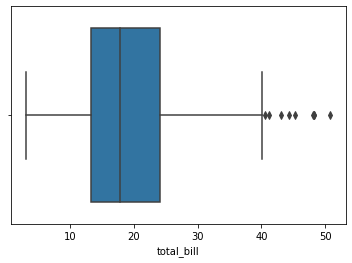

In [6]:
sns.boxplot(x=tips['total_bill'])

In [7]:
tips['total_bill'].median()

17.795

In [8]:
tips['total_bill'].values

array([16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
       14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29,
       16.97, 20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37,
       12.69, 21.7 , 19.65,  9.55, 18.35, 15.06, 20.69, 17.78, 24.06,
       16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94,  9.68, 30.4 ,
       18.29, 22.23, 32.4 , 28.55, 18.04, 12.54, 10.29, 34.81,  9.94,
       25.56, 19.49, 38.01, 26.41, 11.24, 48.27, 20.29, 13.81, 11.02,
       18.29, 17.59, 20.08, 16.45,  3.07, 20.23, 15.01, 12.02, 17.07,
       26.86, 25.28, 14.73, 10.51, 17.92, 27.2 , 22.76, 17.29, 19.44,
       16.66, 10.07, 32.68, 15.98, 34.83, 13.03, 18.28, 24.71, 21.16,
       28.97, 22.49,  5.75, 16.32, 22.75, 40.17, 27.28, 12.03, 21.01,
       12.46, 11.35, 15.38, 44.3 , 22.42, 20.92, 15.36, 20.49, 25.21,
       18.24, 14.31, 14.  ,  7.25, 38.07, 23.95, 25.71, 17.31, 29.93,
       10.65, 12.43, 24.08, 11.69, 13.42, 14.26, 15.95, 12.48, 29.8 ,
        8.52, 14.52,

In [17]:
q1,q3=np.percentile(tips['total_bill'],[25,75])

In [10]:
print(q1) 
print(q2)

13.3475


NameError: name 'q2' is not defined

### q1----25% of the data points are below the value of 13.34

### q3---75% of the data points are below the value of 24.12

In [18]:
iqr=q3-q1

In [19]:
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)

In [20]:
print(f" lower bound : {lower_bound:.2f} and upper bound : {upper_bound:.2f}")

 lower bound : -2.82 and upper bound : 40.30


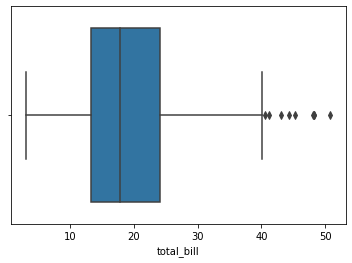

In [21]:
sns.boxplot(x=tips['total_bill'])

In [22]:
tips[tips['total_bill']> upper_bound]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


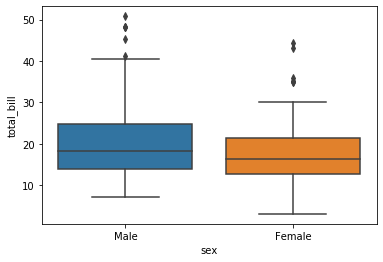

In [23]:
sns.boxplot(x='sex',y='total_bill',data=tips)

# here 'total bill' datapints splits gender wise and then their iqr and box plot is presentated

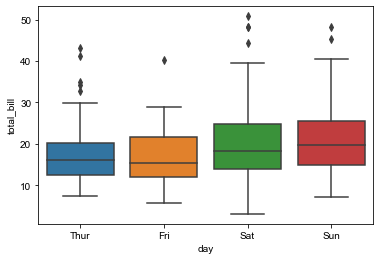

In [24]:
sns.boxplot(x='day',y='total_bill',data=tips)
sns.set()

# here 'total bill' data points are divided among the 'day' catagories 
#and then for each indidual 'day' wise dataponits iqr and box plot created

# Finding Outiliers using Z Score

In [13]:
threshold=3

std=tips['total_bill'].std()

mean=tips['total_bill'].mean()

In [14]:
outlier=[]

for i in tips['total_bill'].values:
    
    z_score=np.abs((i-mean)/std)
    
    if z_score > threshold:
        outlier.append(i)

    
# Here we are calculating the z-score of each data point
# which show us how much SD away is it from mean
# if z_score is more that 3 SD away, we are declaring it as outliers


In [15]:
print(outlier)

[48.27, 48.17, 50.81, 48.33]
